In [1]:
corner_size=2

In [2]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
import numpy as np
from multiply_connected_pipe import *
import pickle
from matplotlib import pyplot as plt
from numpy import array as arr

In [3]:
def merging2pipe(pipes):
    curves = []
    for pipe in pipes:
        curves += pipe.curves
    i = 0
    while i < len(curves):
        if not isinstance(curves[i], Cap):
            i += 1
            continue
        for j in range(i+1,len(curves)):
            if not isinstance(curves[j], Cap):
                continue
            if np.linalg.norm(curves[i].matching_pt - curves[j].matching_pt) < 1e-8:
                curves.pop(j)
                curves.pop(i)
                break
        i += 1
    curves = [c.clean_copy() for c in curves]
    return MultiplyConnectedPipeFromCurves(curves)

def transformed(pipe,shift):
    curves = [c.transformed(shift) for c in pipe.curves]
    return MultiplyConnectedPipeFromCurves(curves)

def plyg_bdr(pipe):
    pts = []
    for c in pipe.exterior_boundary.curves:
        pts += [c.start_pt]
        if isinstance(c, Corner):
            pts += [c.mid_pt]
    
    return np.array(pts + [pts[0]]).T

def plyg_bdr2(boundary):
    pts = []
    for c in boundary.curves:
        pts += [c.start_pt]
        if isinstance(c, Corner):
            pts += [c.mid_pt]
    
    return np.array(pts + [pts[0]]).T

def transformeds(pipes,shift): return [transformed(p,shift)  for p in pipes]
def transformeds2(pipes_and_shifts,shift): return [(p,s+shift)  for p,s in pipes_and_shifts]
    

draw connection of a rather complicated pipe system 

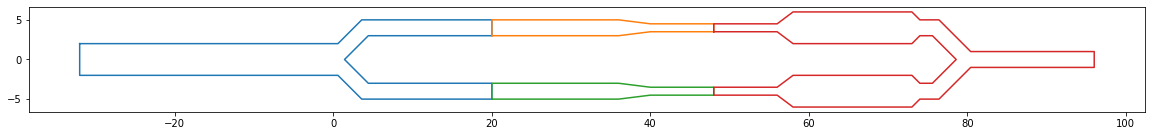

In [4]:
fig, ax = plt.subplots(figsize=(20,5))

pipe111 = NLets(arr([pt(-32,0),pt(2,-2),pt(2,2)]),np.array([2,1,1]),corner_size=corner_size)
pipe112 = transformed(NLets(arr([pt(-2,-2),pt(16,0)]), np.array([1,1]),corner_size=corner_size),pt(4,4))
pipe113 = transformed(NLets(arr([pt(16,0),pt(-2,2)]), np.array([1,1]),corner_size=corner_size),pt(4,-4))



pipe1 = merging2pipe([pipe111,pipe112,pipe113])
shift1 = pt(0,0)

pipe2 = PipeWithDifferentRadius(16,4,8,1,0.5,corner_size=corner_size)
shift2 = pt(20,4)

pipe3 = PipeWithDifferentRadius(16,4,8,1,0.5,corner_size=corner_size)
shift3 = pt(20,-4)

pipe41 = transformed(PipeWithDifferentRadius(8,2,14,0.5,2,corner_size=corner_size),pt(0,4))
pipe42 = transformed(PipeWithDifferentRadius(8,2,14,0.5,2,corner_size=corner_size),pt(0,-4))
pipe43 = transformed(PipeWithDifferentRadius(1,1,1,2,1,corner_size=corner_size),pt(24,4))
pipe44 = transformed(PipeWithDifferentRadius(1,1,1,2,1,corner_size=corner_size),pt(24,-4))
pipe45 = transformed(NLets(arr([pt(-1,0),pt(2,-2)]),arr([1,1]),corner_size=corner_size),pt(28,4))
pipe46 = transformed(NLets(arr([pt(-1,0),pt(2,2)]),arr([1,1]), corner_size=corner_size),pt(28,-4))
pipe47 = transformed(NLets(arr([pt(-2,-2),pt(16,0), pt(-2,2)]),np.array([1,1,1]), corner_size=corner_size),pt(32,0))

pipe4 = merging2pipe([pipe41,pipe42,pipe43,pipe44,pipe45,pipe46,pipe47])
shift4 = pt(48,0)

pipes = [pipe1,pipe2,pipe3,pipe4]
shifts = [shift1,shift2,shift3,shift4]

pipes_and_shifts = list(zip(pipes,shifts))

ax.set_aspect('equal')
for pipe,shift in pipes_and_shifts:
    ax.plot(*(plyg_bdr(pipe) + shift[:,np.newaxis]))

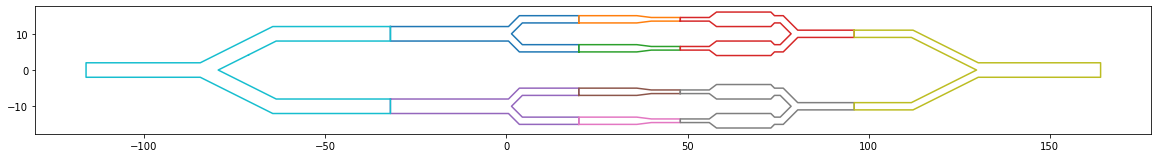

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

pipes_and_shifts2 = transformeds2(pipes_and_shifts,pt(0,10)) + transformeds2(pipes_and_shifts,pt(0,-10))

pipe51 = transformed(NLets(arr([pt(-16,0),pt(2,-1)]),arr([1,1]),corner_size=corner_size),pt(0,10))
pipe52 = transformed(NLets(arr([pt(-16,0),pt(2,1)]),arr([1,1]), corner_size=corner_size),pt(0,-10))
pipe53 = transformed(NLets(arr([pt(-18,-9),pt(32,0),pt(-18,9)]),arr([1,2,1]),corner_size=corner_size),pt(20,0))

pipe5 = merging2pipe([pipe51,pipe52,pipe53])
shift5 = pt(112,0)


pipe61 = transformed(NLets(arr([pt(-8,-4),pt(32,0)]),arr([2,2]),corner_size=corner_size),pt(0,10))
pipe62 = transformed(NLets(arr([pt(32,0),pt(-8,4)]),arr([2,2]),corner_size=corner_size),pt(0,-10))
pipe63 = transformed(NLets(arr([pt(-32,0),pt(12,-6),pt(12,6)]),arr([2,2,2]),corner_size=corner_size),pt(-20,0))

pipe6 = merging2pipe([pipe61,pipe62,pipe63])
shift6 = pt(-64,0)

pipes_and_shifts3 = pipes_and_shifts2 + [(pipe5,shift5),(pipe6,shift6)]

for pipe,shift in pipes_and_shifts3:
    ax.plot(*(plyg_bdr(pipe) + shift[:,np.newaxis]))


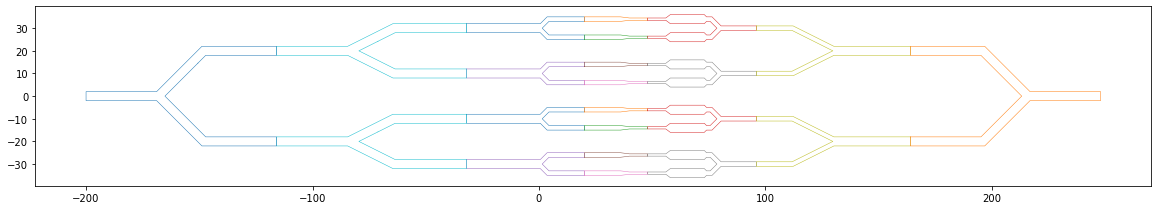

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')

pipes_and_shifts4 = transformeds2(pipes_and_shifts3,pt(0,20)) + transformeds2(pipes_and_shifts3,pt(0,-20))

pipe71 = transformed(NLets(
    arr([pt(-4,-4),pt(32,0)]),
    arr([2,2]),
    corner_size=corner_size),pt(0,20))
pipe72 = transformed(NLets(
    arr([pt(32,0),pt(-4,4)]),
    arr([2,2]),
    corner_size=corner_size),pt(0,-20))
pipe73 = transformed(NLets(
    arr([pt(-32,0),pt(16,-16),pt(16,16)]),
    arr([2,2,2]),
    corner_size=corner_size),pt(-20,0))

pipe7 = merging2pipe([pipe71,pipe72,pipe73])
shift7 = pt(-148,0)

pipe81 = transformed(NLets(
    arr([pt(-32,0),pt(4,4)]),
    arr([2,2]),
    corner_size=corner_size),pt(0,-20))
pipe82 = transformed(NLets(
    arr([pt(-32,0),pt(4,-4)]),
    arr([2,2]),
    corner_size=corner_size),pt(0,20))
pipe83 = transformed(NLets(
    arr([pt(-16,-16),pt(32,0),pt(-16,16)]),arr([2,2,2])),pt(20,0))

pipe8 = merging2pipe([pipe81,pipe82,pipe83])
shift8 = pt(196,0)

pipes_and_shifts5 = pipes_and_shifts4 + [(pipe7,shift7),(pipe8,shift8)]
for pipe,shift in pipes_and_shifts5:
    ax.plot(*(plyg_bdr(pipe) + shift[:,np.newaxis]),linewidth=0.5)

In [7]:
with open('pipes_and_shifts.pickle','wb') as f:
    pickle.dump(pipes_and_shifts5,f)

In [8]:
global_pipe = merging2pipe([transformed(pipe,shift) for pipe,shift in pipes_and_shifts5])

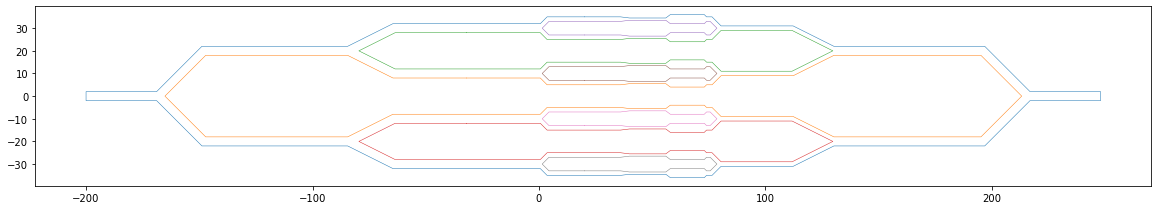

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
for b in global_pipe.boundaries:
    ax.plot(*(plyg_bdr2(b)),linewidth=0.5)


In [10]:
with open('global_pipe.pickle','wb') as f:
    pickle.dump(global_pipe,f)